# Capítulo 12: Manipulando átomos e moléculas com a biblioteca ASE

Livro: Aprendendo Química com Python, Rodrigo Q. de Albuquerque & Gerd B. da Rocha, 2021, Amazon Book.

E-Mail: learn.chem.python@gmail.com

## Versão do Python usada

In [1]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


### Caixa de sessão interativa 42: ASE: manipulando moléculas

In [2]:
from ase import Atoms                # criar objetos atômicos
from ase.io import write, read           # ler/salvar objetos
from ase.visualize import view           # visualizar objetos

In [3]:
# Gere uma molécula (ex: H2)
coords = [[0, 0, 0], [0.7, 0, 0]]
labels = ['H', 'H']
mol = Atoms(positions = coords, symbols = labels)

In [4]:
# cheque algumas propriedades úteis do objeto 'mol'
mol.get_chemical_symbols()                # símbolos atômicos

['H', 'H']

In [5]:
mol.get_atomic_numbers()                   # números atômicos

array([1, 1])

In [6]:
mol.get_masses()                             # massas molares

array([1.008, 1.008])

In [7]:
mol.get_chemical_formula()                  # fórmula química

'H2'

In [8]:
mol.get_all_distances() # distâncias (Angstroms) entre átomos

array([[0. , 0.7],
       [0.7, 0. ]])

In [9]:
# acesse e modifique as coordenadas xyz do objeto 'mol'
coords = mol.get_positions()     # coords = variável indexada
cm = mol.get_center_of_mass()               # centro de massa
newcoords = coords - cm                   # novas coordenadas
mol.set_positions(newcoords)   # mude as coordenadas de 'mol'
mol.get_positions()             # cheque as novas coordenadas

array([[-0.35,  0.  ,  0.  ],
       [ 0.35,  0.  ,  0.  ]])

In [48]:
# salve como xyz e png e visualize 'mol'
write('h2.xyz', mol)          # salve o objeto 'mol' como xyz
write('h2.png', mol)          # salve o objeto 'mol' como png
view(mol)  # No Jupyter notebook, use view(mol, viewer='x3d')

In [11]:
view(mol, viewer = 'x3d')  # Usar quando estiver executando esse código no ambiente do Jupyter notebook

### Caixa de código 33: ASE: gerando ﬁguras de alta qualidade com PovRay

In [1]:
from ase.io import read, write
from ase.io.pov import get_bondpairs
mol = read('h2.xyz')     # importe a molécula salva anteriormente
bondpairs = get_bondpairs(mol)
r = [0.2, 0.2]     # raios de cada esfera/átomo para renderização
# Para raios personalizados pra diversos átomos, use por exemplo:
# raios = {'C': 0.4, 'H': 0.2, 'N': 0.7, 'O': 0.5}
# r = [raios[atom.symbol] for atom in mol] 
mydict = dict(canvas_width = 200, bondatoms = bondpairs) # povray
image = write('h2.pov', mol, radii = r, povray_settings = mydict)
image.render()

### Caixa de sessão interativa 43: ASE: Manipulando várias moléculas (parte I)

In [29]:
import os
from ase.io import write, read

In [30]:
molecules = []          # lista para guardar os objetos 'mol'
folders = ['molecules1', 'molecules2']       # sub-diretórios

In [31]:
# Comando para ver se os diretórios na lista folders já existem
# Sejá existirem, não execute as duas próximas células

!ls molecules*

ls: não foi possível acessar 'molecules*': Arquivo ou diretório inexistente


In [32]:
!mkdir molecules1

In [33]:
!mkdir molecules2

In [34]:
%%file ./molecules1/h2o.xyz
3

O        0.03991322       0.05636463       0.00303043
H       -0.31674678      -0.40040537      -0.89643957
H       -0.31675678      -0.49421537       0.84834043

Writing ./molecules1/h2o.xyz


In [35]:
%%file ./molecules1/nh3.xyz
4

N       -0.02012330      -0.00086057       0.05691048
H        0.99987670      -0.00086057       0.05691048
H       -0.36012330      -0.82632057      -0.43645952
H       -0.36012330       0.83913943      -0.41126952

Writing ./molecules1/nh3.xyz


In [36]:
%%file ./molecules2/ch4.xyz
5

C       -0.00000000       0.00000000       0.00000000
H        1.07000000       0.00000000       0.00000000
H       -0.35666000      -0.45677000      -0.89947000
H       -0.35667000       1.00735000       0.05416000
H       -0.35667000      -0.55058000       0.84531000

Writing ./molecules2/ch4.xyz


In [37]:
%%file ./molecules2/bf3.xyz
4

B       -0.00000000       0.00000000       0.00000000
F        1.10800000       0.00000000       0.00000000
F       -0.55400000      -0.91751000       0.28093000
F       -0.55400000       0.91751000      -0.28093000

Writing ./molecules2/bf3.xyz


In [38]:
for folder in folders:  # itere sobre os elementos de folders
    os.chdir(folder)       # Vá para o sub-diretório 'folder'
    list_mols = os.listdir()    # gere lista dos arquivos xyz
    for molecule in list_mols:  # itere sobre os arquivos xyz
        mol = read(molecule)     # abra 'molecule' como 'mol'
        coords = mol.get_positions()  # guarde as coordenadas
        cm = mol.get_center_of_mass() # use o centro de massa
        newcoords = coords - cm      # corrija as coordenadas
        mol.set_positions(newcoords)# atualize as coordenadas
        write(molecule, mol)     # salve o arquivo 'molecule'
        molecules.append(mol)        # adicione 'mol' à lista
    os.chdir('../')             # volte pro diretório inicial

In [39]:
molecules            # cheque os objetos da lista 'molecules'

[Atoms(symbols='OH2', pbc=False),
 Atoms(symbols='NH3', pbc=False),
 Atoms(symbols='BF3', pbc=False),
 Atoms(symbols='CH4', pbc=False)]

### Caixa de sessão interativa 44: ASE: Manipulando várias moléculas (parte II)

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from ase.visualize.plot import plot_atoms

In [41]:
nmols = len(molecules)  # lista 'molecules' = sessão anterior
sqrt = np.sqrt(nmols)            # grade quadrada de gráficos
if nmols % sqrt == 0:      # 'nmols' é um múltiplo de 'sqrt'?
    grid = int(sqrt)
else:
    grid = int(sqrt) + 1

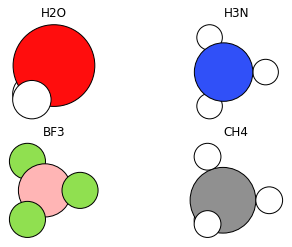

In [44]:
for i, system in enumerate(molecules):
    plt.subplot(grid, grid, i+1)
    fig = plot_atoms(system) # 'fig =' previne extra outputs
    name = system.get_chemical_formula()
    plt.title(name)
    plt.axis('off')

plt.show()            # ou salve com plt.savefig("molecules.png")

In [45]:
plt.savefig('minhafigura.png', dpi = 400)

<Figure size 432x288 with 0 Axes>

### Caixa de código 34: ASE: Visualizando várias moléculas com ASE/POV-Ray

In [2]:
# Atenção: a lista 'molecules' tem que existir previamente!
import matplotlib.pyplot as plt
import numpy as np
from ase.io.pov import get_bondpairs
import matplotlib.image as mpimg

nmols = len(molecules)
sqrt = np.sqrt(nmols)
if nmols % sqrt == 0:          # 'nmols' é um múltiplo de 'sqrt'?
    grid = int(sqrt)
else:
    grid = int(sqrt) + 1  

names = []
for i, mol in enumerate(molecules):      # itere sobre os objetos
    natoms = len(mol)              # número de átomos da molécula
    bondpairs = get_bondpairs(mol)   # ligações químicas de 'mol'
    r = [0.1] * natoms       # raios dos átomos para renderização
    names.append(mol.get_chemical_formula())# fórmula da molécula
    mydict = dict(canvas_width = 100, bondatoms = bondpairs)
    image = write(f'molec_{i}.pov', mol, radii = r, povray_settings = mydict)
    image.render()
    
for i in range(nmols):        # itere sobre o número de moléculas
    plt.subplot(grid, grid, i+1)
    img = mpimg.imread(f'molec_{i}.png')  # importe 'molec_i.png'
    plt.imshow(img)                         # plote 'molec_i.png'
    plt.title(names[i])                   # título do sub-gráfico
    plt.axis('off')                             # remova os eixos

plt.savefig('molecules_pov.png', dpi = 400)